In [2]:
# Data Overview and EDA

import pandas as pd

base_path = "/Users/howard/Downloads/formula-1-lap-time-prediction-nwvs-s00e02"

train_df = pd.read_csv(f"{base_path}/train.csv")
test_df = pd.read_csv(f"{base_path}/test.csv")

Data Overview and EDA

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# setting plot style
sns.set(style = "whitegrid")

print("Preview of train.csv")
display(train_df.head())

print("\nDataset Info:")
train_df.info()

display(test_df.head())
test_df.info()

Preview of train.csv


,id,race,date,time,circuit,latitude,longitude,altitude,driver,carNumber,constructor,avgDriverFinish,avgConstructorFinish,lapNumber,lapPosition,pitStop,pitCount,pitTime_ms,lapTime_ms
0,1,British Grand Prix,2017-07-16,12:00:00,Silverstone Circuit,52.0786,-1.01694,153,"Ricciardo, Daniel",3,Red Bull,9.799145,3.033426,18,10,0,0,0.0,94846
1,2,Australian Grand Prix,2023-04-02,05:00:00,Albert Park Grand Prix Circuit,-37.8497,144.96800,10,"Hülkenberg, Nico",27,Haas F1 Team,12.418502,7.871795,13,7,0,1,0.0,83719
2,3,Mexican Grand Prix,2019-10-27,19:10:00,Autódromo Hermanos Rodríguez,19.4042,-99.09070,2227,"Magnussen, Kevin",20,Haas F1 Team,13.808140,7.871795,46,16,0,1,0.0,82213
3,4,United States Grand Prix,2000-09-24,NaN,Indianapolis Motor Speedway,39.7950,-86.23470,223,"Mazzacane, Gastón",21,Minardi,21.468750,10.394659,42,13,0,0,0.0,76951
4,5,Hungarian Grand Prix,2011-07-31,12:00:00,Hungaroring,47.5789,19.24860,264,"d'Ambrosio, Jérôme",25,Virgin,21.518519,11.736842,48,19,0,3,0.0,151214



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    30000 non-null  int64  
 1   race                  30000 non-null  object 
 2   date                  30000 non-null  object 
 3   time                  22965 non-null  object 
 4   circuit               30000 non-null  object 
 5   latitude              30000 non-null  float64
 6   longitude             30000 non-null  float64
 7   altitude              30000 non-null  int64  
 8   driver                30000 non-null  object 
 9   carNumber             30000 non-null  int64  
 10  constructor           30000 non-null  object 
 11  avgDriverFinish       30000 non-null  float64
 12  avgConstructorFinish  30000 non-null  float64
 13  lapNumber             30000 non-null  int64  
 14  lapPosition           30000 non-null  int64  
 15  pitS

,id,race,date,time,circuit,latitude,longitude,altitude,driver,carNumber,constructor,avgDriverFinish,avgConstructorFinish,lapNumber,lapPosition,pitStop,pitCount,pitTime_ms
0,30001,German Grand Prix,2011-07-24,12:00:00,Nürburgring,50.3356,6.94750,578,"Glock, Timo",24,Virgin,17.725490,11.736842,35,18,0,1,0.0
1,30002,Austrian Grand Prix,2022-07-10,13:00:00,Red Bull Ring,47.2197,14.76470,678,"Sainz, Carlos",55,Ferrari,9.011429,2.833984,22,2,0,0,0.0
2,30003,Japanese Grand Prix,2003-10-12,NaN,Suzuka Circuit,34.8431,136.54100,45,"Fisichella, Giancarlo",11,Jordan,10.196507,6.771784,21,14,0,0,0.0
3,30004,Dutch Grand Prix,2021-09-05,13:00:00,Circuit Park Zandvoort,52.3888,4.54092,6,"Russell, George",63,Williams,13.308511,5.246659,52,12,0,1,0.0
4,30005,British Grand Prix,2015-07-05,12:00:00,Silverstone Circuit,52.0786,-1.01694,153,"Vettel, Sebastian",5,Ferrari,5.839465,2.833984,47,3,0,2,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20714 entries, 0 to 20713
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    20714 non-null  int64  
 1   race                  20714 non-null  object 
 2   date                  20714 non-null  object 
 3   time                  15877 non-null  object 
 4   circuit               20714 non-null  object 
 5   latitude              20714 non-null  float64
 6   longitude             20714 non-null  float64
 7   altitude              20714 non-null  int64  
 8   driver                20714 non-null  object 
 9   carNumber             20714 non-null  int64  
 10  constructor           20714 non-null  object 
 11  avgDriverFinish       20714 non-null  float64
 12  avgConstructorFinish  20714 non-null  float64
 13  lapNumber             20714 non-null  int64  
 14  lapPosition           20714 non-null  int64  
 15  pitStop            

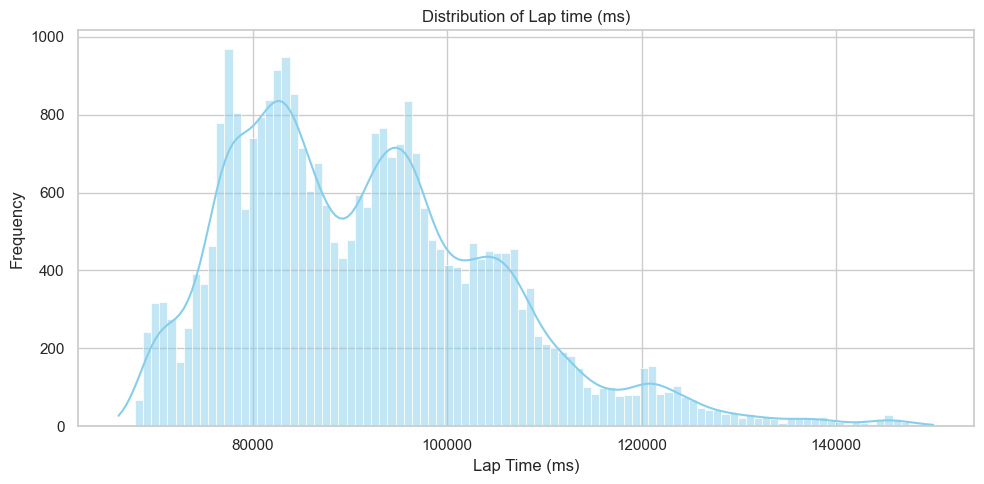

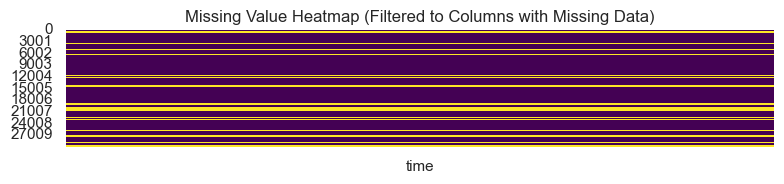

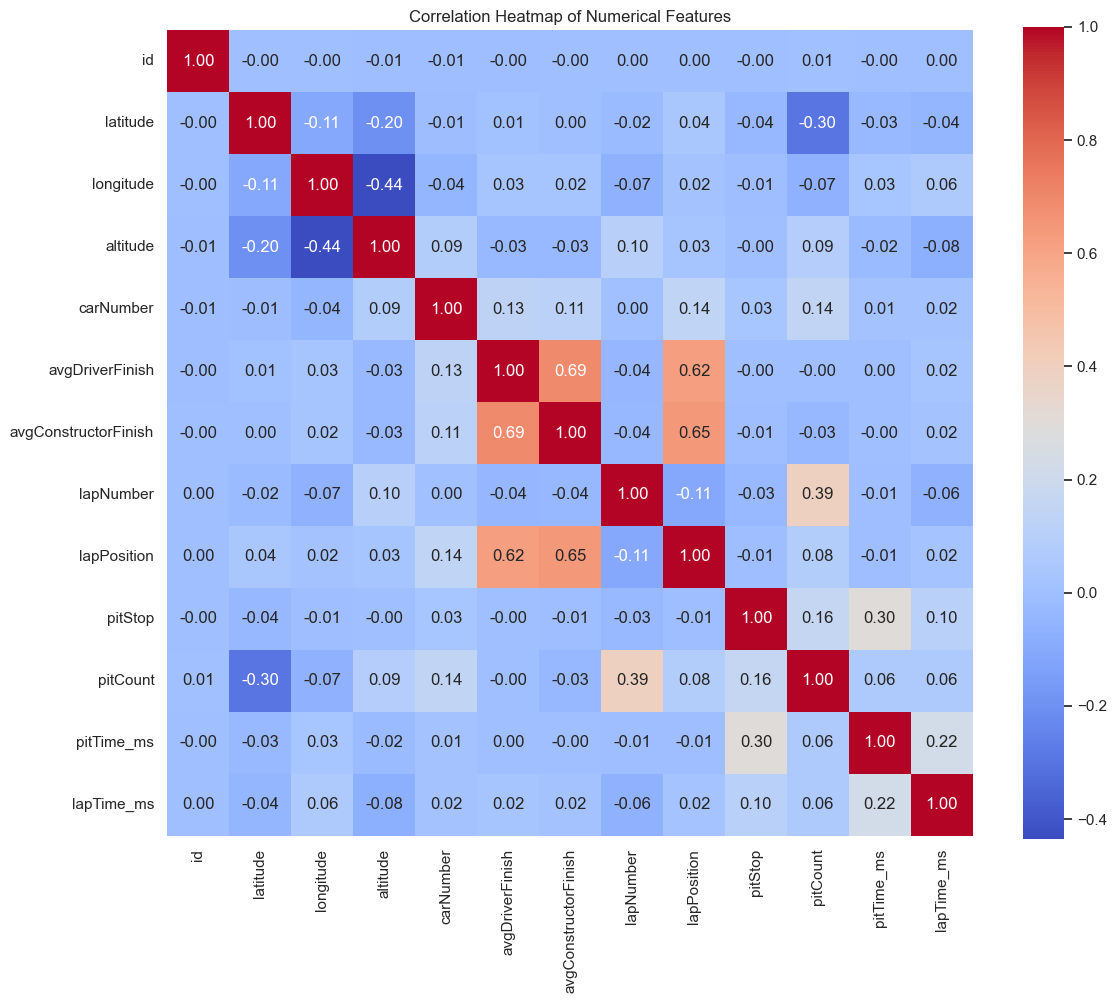

In [4]:
# plot of distribution of target variable: lap time in ms

## zooming in the plot for easier readability
filtered_df = train_df[train_df['lapTime_ms'] < 150000]

plt.figure(figsize = (10, 5))
sns.histplot(filtered_df['lapTime_ms'], bins = 100, kde = True, color = "skyblue")
plt.title("Distribution of Lap time (ms)")
plt.xlabel("Lap Time (ms)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

'''
# visualizing missing data
plt.figure(figsize = (12, 2))
sns.heatmap(train_df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Missing Value Heatmap')
plt.tight_layout()
plt.show()
'''
# visualizing missing data

## selecting columns with at least one missing value
missing_cols = train_df.columns[train_df.isnull().any()]

plt.figure(figsize = (8, 2))
sns.heatmap(train_df[missing_cols].isnull(), cbar = False, cmap = 'viridis')
plt.title('Missing Value Heatmap (Filtered to Columns with Missing Data)')
plt.tight_layout()
plt.show()


# correlation heatmap of numerical features

## selecting only numeric columns for correlation anaylsis
numeric_data = train_df.select_dtypes(include = 'number')

correlation_matrix = numeric_data.corr()

plt.figure(figsize = (12, 10))
sns.heatmap(correlation_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm', square = True)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

1. Distribution of Lap Time Plot
 - distribution is multimodal
  - different types of laps; clean race laps, laps with traffic, or laps affected by tire wear
  - possible influence of track layout or pit strategy on lap time clusters
 - this filtered plot gives a much clearer picture of lap time variability
 - it may help segment laps (eg. fastest laps, in-laps, out-laps) during modeling
 - model will likely benefit from capturing nonlinear relationships

2. Missing Value Heatmap
 - only the time column has missing values
 - gaps are scattered throughout the dataset (not clustered)
 - time column is non-essential for my modeling goal, so drop it

3. Corrrelation Heatmap
 - Most features have low correlation with lapTime_ms.
  - pitTime_ms shows the highest positive correlation with lapTime_ms (+0.22):
   - Longer pit time → longer lap.
 - Weak positive correlation:
  - pitStop, pitCount: expected since more pit activity inflates lap time.
 - Very weak or no correlation:
  - lapNumber, carNumber, altitude, latitude, etc.
 - Strong internal correlation between:
  - avgDriverFinish and avgConstructorFinish (+0.69): faster drivers often race for stronger teams.


In [5]:
# filtering the dataset so that it defines the 2025 Circuits that are present in the dataset

circuits_2025_present = [
    "Albert Park Grand Prix Circuit",
    "Shanghai International Circuit",
    "Suzuka Circuit",
    "Bahrain International Circuit",
    "Circuit de Monaco",
    "Circuit Gilles Villeneuve",
    "Red Bull Ring",
    "Silverstone Circuit",
    "Circuit de Spa-Francorchamps",
    "Hungaroring",
    "Circuit Park Zandvoort",
    "Autodromo Nazionale di Monza",
    "Baku City Circuit",
    "Circuit of the Americas",
    "Autódromo Hermanos Rodríguez",
    "Autódromo José Carlos Pace",
    "Yas Marina Circuit"
]

train_2025 = train_df[train_df['circuit'].isin(circuits_2025_present)].copy()

print("Filtered DataFrame shape:", train_2025.shape)
print("Number of unique circuits in filtered data:", train_2025['circuit'].nunique())
print("Circuits included:")
print(sorted(train_2025['circuit'].unique()))

Filtered DataFrame shape: (22393, 19)
Number of unique circuits in filtered data: 17
Circuits included:
['Albert Park Grand Prix Circuit', 'Autodromo Nazionale di Monza', 'Autódromo Hermanos Rodríguez', 'Autódromo José Carlos Pace', 'Bahrain International Circuit', 'Baku City Circuit', 'Circuit Gilles Villeneuve', 'Circuit Park Zandvoort', 'Circuit de Monaco', 'Circuit de Spa-Francorchamps', 'Circuit of the Americas', 'Hungaroring', 'Red Bull Ring', 'Shanghai International Circuit', 'Silverstone Circuit', 'Suzuka Circuit', 'Yas Marina Circuit']


The step above is needed because our project objective is to focus on circuits that are present in the 2025 F1 calendar.
Since there are recent circuits that are not present in the dataset, the dataframe was filtered from the original to only include data from:
 - circuits that are present in the 2025 F1 calendar
  - 2025 circuits that are not present in the dataset are not considered for this project
 - the circuits that are present in the dataset but are not part of the 2025 F1 calendar were filtered out due to the project's focus.

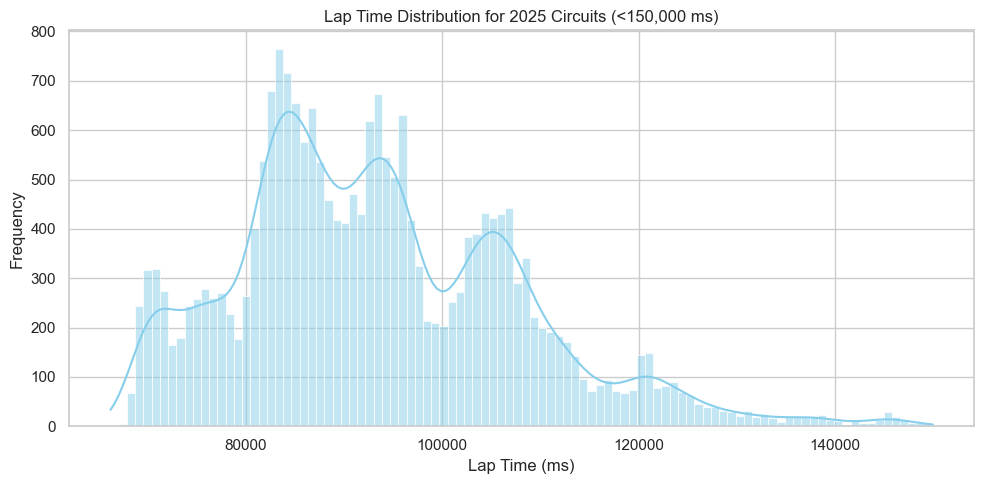

/var/folders/1c/_1d58br12s5gq4_rbx05s7x40000gn/T/ipykernel_20137/2069787062.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_lap_by_circuit.values, y=avg_lap_by_circuit.index, palette='coolwarm')


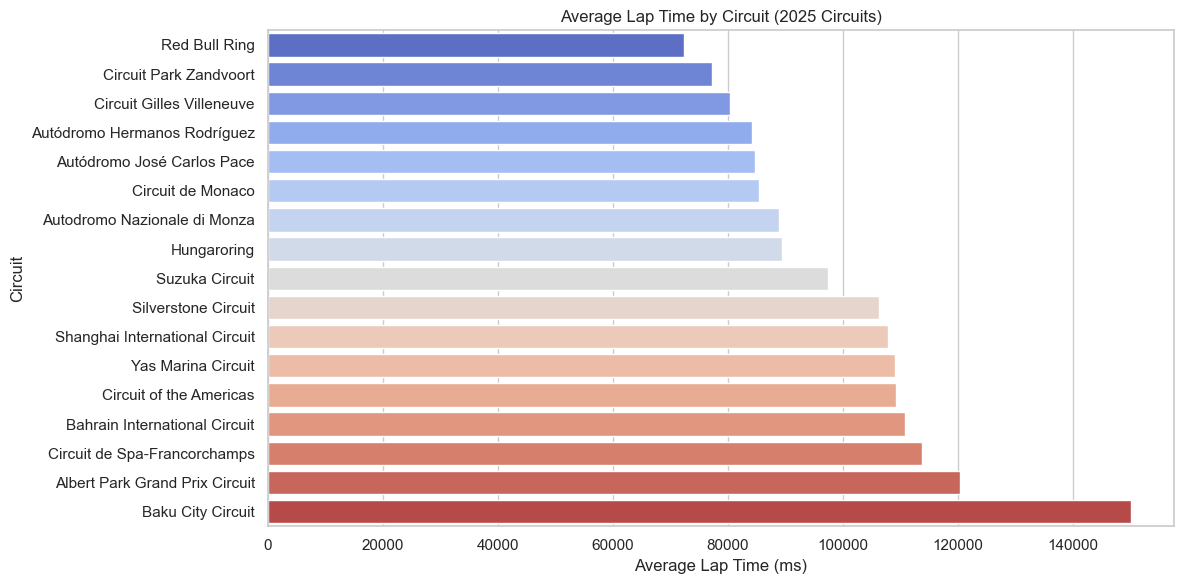

/var/folders/1c/_1d58br12s5gq4_rbx05s7x40000gn/T/ipykernel_20137/2069787062.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_lap_by_constructor.values, y=avg_lap_by_constructor.index, palette='mako')


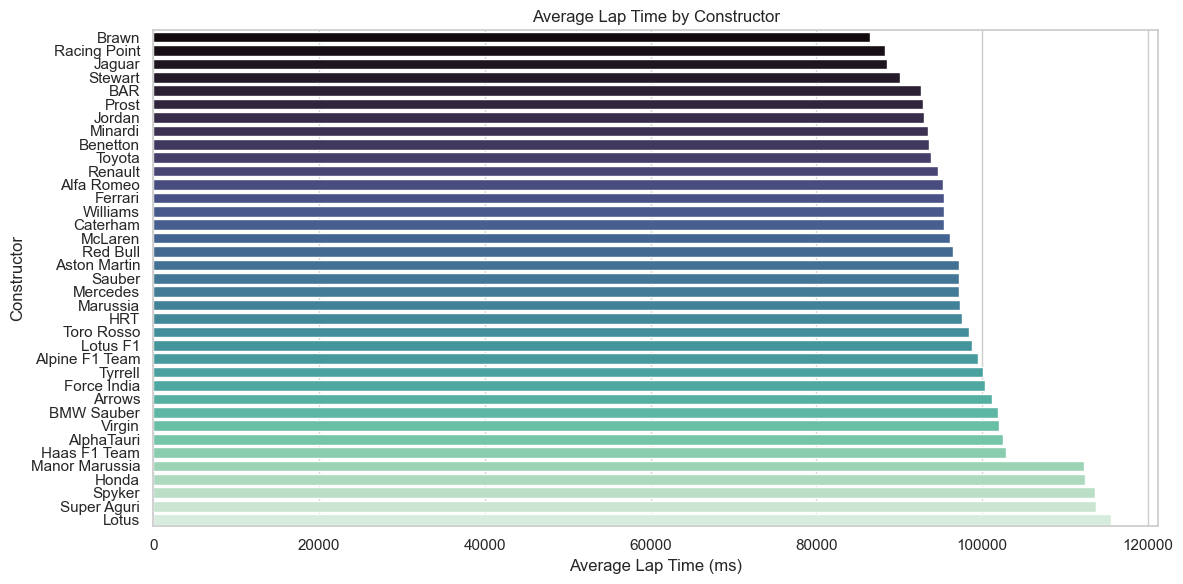

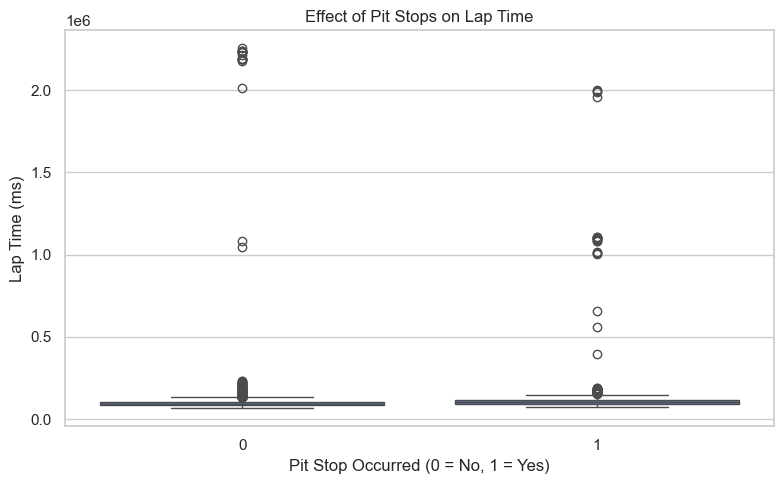

In [6]:
# distribution of lap time (filtered for 2025 circuits)
filtered_laps = train_2025[train_2025['lapTime_ms'] < 150000]

plt.figure(figsize=(10, 5))
sns.histplot(filtered_laps['lapTime_ms'], bins=100, kde=True, color="skyblue")
plt.title("Lap Time Distribution for 2025 Circuits (<150,000 ms)")
plt.xlabel("Lap Time (ms)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# average lap time by circuit
avg_lap_by_circuit = train_2025.groupby('circuit')['lapTime_ms'].mean().sort_values()


plt.figure(figsize=(12, 6))
sns.barplot(x=avg_lap_by_circuit.values, y=avg_lap_by_circuit.index, palette='coolwarm')
plt.title("Average Lap Time by Circuit (2025 Circuits)")
plt.xlabel("Average Lap Time (ms)")
plt.ylabel("Circuit")
plt.tight_layout()
plt.show()

# average lap time by constructor
avg_lap_by_constructor = train_2025.groupby('constructor')['lapTime_ms'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_lap_by_constructor.values, y=avg_lap_by_constructor.index, palette='mako')
plt.title("Average Lap Time by Constructor")
plt.xlabel("Average Lap Time (ms)")
plt.ylabel("Constructor")
plt.tight_layout()
plt.show()

# pit stop effect on lap time
plt.figure(figsize=(8, 5))
sns.boxplot(x='pitStop', y='lapTime_ms', data=train_2025)
plt.title("Effect of Pit Stops on Lap Time")
plt.xlabel("Pit Stop Occurred (0 = No, 1 = Yes)")
plt.ylabel("Lap Time (ms)")
plt.tight_layout()
plt.show()

1. Lap Time Distribution
 - lap times are not normally distributed - it is right-skewed
 - there are clear multiple peaks
  - different track layouts (short vs. long circuits)
  - laps with and without pit stops
  - carying weather or safety car conditions
 - lap times most fall between 70k - 120k ms (70 - 120 sec)
 - modeling this variable will benefit from:
  - handling skewness
  - possibly creating track specific models or features

2. Average Lap Time by Circuit
 - Red Bull Ring has the shortest average lap time, followed by Zandvoort and Gilles Villeneuve.
 - Baku City Circuit has the longest lap time on average — expected, as it has one of the longest lap distances in F1.
 - Albert Park and Spa-Francorchamps also have longer lap times, aligning with their real-world layouts.
 - Circuit characteristics (length, speed, corner count) significantly influence lap time.
 - may want to include:
  - circuit length, sector count, or type (street vs. permanent) as features.

3. Average Lap Time by Constructor
 - Constructors like Brawn, Racing Point, and Jaguar have some of the fastest average lap times.
 - Older or lower-tier teams like Super Aguri, Spyker, HRT, and Manor are among the slowest.
 - The list includes both historical and current teams, as expected.
 - Clear variation by team — constructor is a critical feature in modeling.
 - You can later focus visuals or discussion only on 2025 teams, but keep the data for modeling.
 - May benefit from encoding constructor using target encoding or categorical embeddings.

4. Effect of Pit Stops on Lap Time
 - As expected, laps with a pit stop (1) have higher lap times, with clear outliers.
 - Even without a pit stop (0), there are some extremely high lap times — likely due to:
  - On-track incidents
  - Safety car conditions
  - Driver errors or mechanical failures
 - pitStop is an important binary feature.
 - Consider creating additional features:
  - is_out_lap, is_in_lap, or pit_strategy_flag
  - Combine with lapNumber or pitCount for richer insights


In [7]:
# adding features is_pit_lap and race_year

## feature 1: 'is_pit_lap'
### a binary flag: 1 if pitStop > 0, otherwise 0
train_2025['is_pit_lap'] = (train_2025['pitStop'] > 0).astype(int)

## feature 2: 'race_year'
### extracting year from the date column
train_2025['race_year'] = pd.to_datetime(train_2025['date'], errors = 'coerce').dt.year

train_2025[['pitStop', 'is_pit_lap', 'date', 'race_year']].head()

# Check if 'is_pit_lap' matches expectation
train_2025[['pitStop', 'is_pit_lap']].value_counts().sort_index()

pitStop  is_pit_lap
0        0             21750
1        1               643
Name: count, dtype: int64

Why were these features created?

1. is_pit_lap (derived from pitStop)
 - To capture whether a lap involved a pit stop. Pit stops significantly increase lap time, so this binary flag helps your model easily distinguish normal laps from pit-affected ones.

2. race_year (derived from date)
 - To capture the year each race occurred. This allows you to account for performance trends over time, such as car evolution, regulation changes, or team improvements across seasons.

Methodology

lapTime_ms     0
driver         0
constructor    0
circuit        0
date           0
dtype: int64


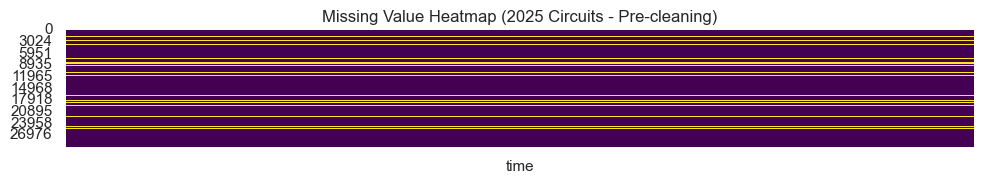

Cleaned dataset shape: (22393, 20)
id                         0
race                       0
time                    3584
circuit                    0
latitude                   0
longitude                  0
altitude                   0
driver                     0
carNumber                  0
constructor                0
avgDriverFinish            0
avgConstructorFinish       0
lapNumber                  0
lapPosition                0
pitStop                    0
pitCount                   0
pitTime_ms                 0
is_pit_lap                 0
race_year                  0
lap_time_sec               0
dtype: int64
id                        int64
race                     object
time                     object
circuit                  object
latitude                float64
longitude               float64
altitude                  int64
driver                   object
carNumber                 int64
constructor              object
avgDriverFinish         float64
avgConstructorFinish

In [22]:
# data cleaning and basic processing

## converting lap time from milliseconds to seconds
train_2025['lap_time_sec'] = train_2025['lapTime_ms'] / 1000

## visualizing missing values
print(train_2025[['lapTime_ms', 'driver', 'constructor', 'circuit', 'date']].isnull().sum())
missing_cols_2025 = train_2025.columns[train_2025.isnull().any()]

plt.figure(figsize = (10, 2))
sns.heatmap(train_2025[missing_cols_2025].isnull(), cbar = False, cmap = 'viridis')
plt.title('Missing Value Heatmap (2025 Circuits - Pre-cleaning)')
plt.tight_layout()
plt.show()

## dropping rows with missing lap time or key info
train_2025_clean = train_2025.dropna(subset = ['lap_time_sec', 'driver', 'constructor', 'circuit', 'date'])

## dropping columns that won't be used in the model
drop_cols = ['raceId', 'driverId', 'constructorId', 'teamColor', 'driverNumber', 'date', 'driverFullName', 'constructorFullName', 'lapTime_ms', 'positionOrder']
train_2025_clean = train_2025_clean.drop(columns = [col for col in drop_cols if col in train_2025_clean.columns])

print(f"Cleaned dataset shape: {train_2025_clean.shape}")
train_2025_clean.head()

print(train_2025_clean.isnull().sum())
print(train_2025_clean.dtypes)


The dataset was cleaned to ensure that all key information is present and in the right format. Lap times have been converted to seconds, missing data rows have been removed, and unnecessary columns have been dropped. The resulting dataset has 22,393 rows. Only one non-essential column (time) has missing values, which can be safely ignored.

In [34]:
# feature engineering

## encoding 'driver', 'constructor' and 'circuit' using category codes
train_2025_clean['driver_encoded'] = train_2025_clean['driver'].astype('category').cat.codes
train_2025_clean['constructor_encoded'] = train_2025_clean['constructor'].astype('category').cat.codes
train_2025_clean['circuit_encoded'] = train_2025_clean['circuit'].astype('category').cat.codes

print("Unique drivers encoded:", train_2025_clean['driver_encoded'].nunique())
print("Unique constructors encoded:", train_2025_clean['constructor_encoded'].nunique())
print("Unique circuits encoded:", train_2025_clean['circuit_encoded'].nunique())

## selecting features for modeling
feature_cols = [
    'lapNumber', 'lapPosition', 'pitStop', 'pitCount', 'pitTime_ms',
    'avgDriverFinish', 'avgConstructorFinish', 'is_pit_lap', 'race_year',
    'driver_encoded', 'constructor_encoded', 'circuit_encoded'
]

X = train_2025_clean[feature_cols]
y = train_2025_clean['lap_time_sec']

print(X.isnull().sum())
print(X.dtypes)

# extracting encoded values
## extracting category encodings from the same columns used for model training
driver_categories = train_2025_clean['driver'].astype('category').cat.categories
constructor_categories = train_2025_clean['constructor'].astype('category').cat.categories
circuit_categories = train_2025_clean['circuit'].astype('category').cat.categories

## converting to mapping dictionaries
driver_map = {v: k for k, v in enumerate(driver_categories)}
constructor_map = {v: k for k, v in enumerate(constructor_categories)}
circuit_map_rev = {k: v for k, v in enumerate(circuit_categories)}

## extracting the specific values
hamilton_id = driver_map.get('Hamilton, Lewis')
ferrari_id = constructor_map.get('Ferrari')
silverstone_id = [k for k, v in circuit_map_rev.items() if 'Silverstone' in v][0]

print("Lewis Hamilton ID:", hamilton_id)
print("Ferrari ID:", ferrari_id)
print("Silverstone Circuit ID:", silverstone_id)


Unique drivers encoded: 110
Unique constructors encoded: 37
Unique circuits encoded: 17
lapNumber               0
lapPosition             0
pitStop                 0
pitCount                0
pitTime_ms              0
avgDriverFinish         0
avgConstructorFinish    0
is_pit_lap              0
race_year               0
driver_encoded          0
constructor_encoded     0
circuit_encoded         0
dtype: int64
lapNumber                 int64
lapPosition               int64
pitStop                   int64
pitCount                  int64
pitTime_ms              float64
avgDriverFinish         float64
avgConstructorFinish    float64
is_pit_lap                int64
race_year                 int32
driver_encoded             int8
constructor_encoded        int8
circuit_encoded            int8
dtype: object
Lewis Hamilton ID: 27
Ferrari ID: 10
Silverstone Circuit ID: 14


In [35]:
print(train_2025_clean['race_year'].value_counts().sort_index())

race_year
1997     570
1998     407
2000     666
2001     305
2003    1636
2007     492
2009     523
2010     544
2011     873
2012     836
2013    1474
2014    1173
2015     886
2016    1379
2017    1777
2018     606
2019    2210
2020     616
2021    2734
2022    1566
2023    1120
Name: count, dtype: int64


In [ ]:
# train and evaluate with cross-validation

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# defining RMSE scoring function
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))

# models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# evaluating each model using cross-validation
cv_results = {}
for name, model in models.items():
    rmse_scores = cross_val_score(model, X, y, cv = 5, scoring = rmse_scorer)
    cv_results[name] = {
        'Mean RMSE': rmse_scores.mean(),
        'STD RMSE': rmse_scores.std()
    }

results_df = pd.DataFrame(cv_results).T.sort_values(by = 'Mean RMSE')
print(results_df)


                   Mean RMSE   STD RMSE
Random Forest      39.904335   2.985208
Gradient Boosting  58.361872   8.432521
Linear Regression  70.365190  12.169642


Based on the output above:
 - Random Forest performs best, with the lowest RMSE (39.90 ms) and the lowest variance across folds. This suggests strong and stable performance.
 - Gradient Boosting is decent but less stable (higher variance).
 - Linear Regression performs worst — lap time prediction is clearly non-linear, so linear models underfit.

So Random Forest is the best model to use for:
 - final training
 - feature importance anaylsis
 - making predictions on the test set

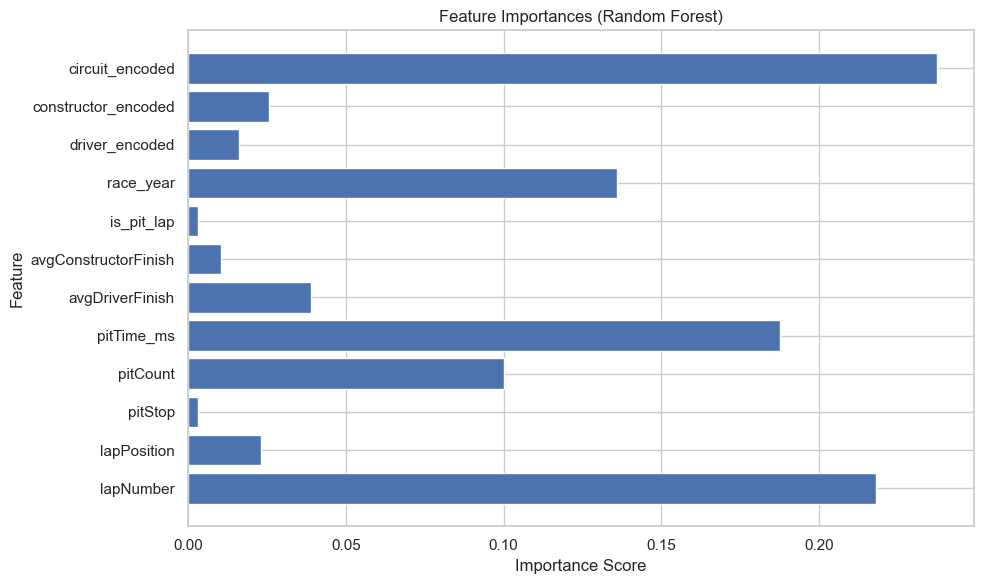

In [17]:
# retraining Random Forest on the full training set (train_2025_clean)
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(X, y)

# viewing feature importance
## get feature importances
importances = final_model.feature_importances_
feature_names = X.columns

## plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

From the Features Importance (Random Forest) plot above:

Top Influential Features:
circuit_encoded
 - Most important — suggests that the track itself has a strong influence on lap times (e.g., circuit layout, elevation, length).
lapNumber
 - Highly influential — indicates that lap time patterns change across the race (e.g., tire wear, fuel load).
pitTime_ms
 - Strongly important — makes sense as pit laps are slower.
race_year
- Surprisingly significant — might reflect performance trends across different seasons.
avgDriverFinish
 - More important than avgConstructorFinish — implies driver skill/consistency matters more than team average performance.

Lower Importance Features:
is_pit_lap, pitStop
 - Low on their own — possibly because pitTime_ms and pitCount already capture pit behavior in a more detailed way.
constructor_encoded, driver_encoded
 - Less important than expected — possibly due to encoding style (integer encoding doesn’t capture similarity between values).
lapPosition
 - Minor role — possibly due to correlation with lap number or low variance.


Simulation and Results

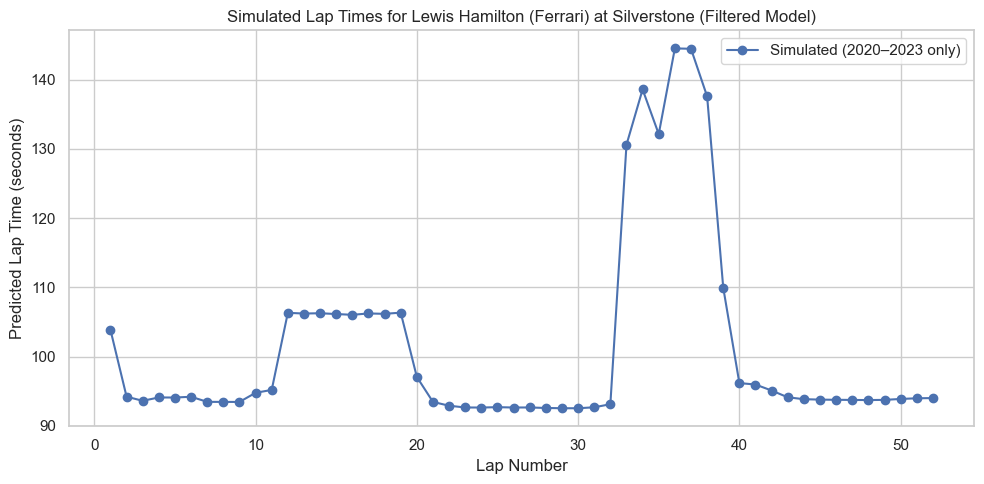

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# filter dataset to 2020–2023 and keep rows for Hamilton or Ferrari
recent_data = train_2025_clean[train_2025_clean['race_year'].between(2020, 2023)]
filtered_data = recent_data[
    (recent_data['driver'] == 'Hamilton, Lewis') |
    (recent_data['constructor'] == 'Ferrari')
].copy()

# re-encode categorical variables
filtered_data['driver_encoded'] = filtered_data['driver'].astype('category').cat.codes
filtered_data['constructor_encoded'] = filtered_data['constructor'].astype('category').cat.codes
filtered_data['circuit_encoded'] = filtered_data['circuit'].astype('category').cat.codes

# define features and target
feature_cols = [
    'lapNumber', 'lapPosition', 'pitStop', 'pitCount', 'pitTime_ms',
    'avgDriverFinish', 'avgConstructorFinish', 'is_pit_lap', 'race_year',
    'driver_encoded', 'constructor_encoded', 'circuit_encoded'
]
X_filtered = filtered_data[feature_cols]
y_filtered = filtered_data['lap_time_sec']

# train new Random Forest model
filtered_model = RandomForestRegressor(n_estimators=100, random_state=42)
filtered_model.fit(X_filtered, y_filtered)

# get new encoded values for simulation
driver_categories = filtered_data['driver'].astype('category').cat.categories
constructor_categories = filtered_data['constructor'].astype('category').cat.categories
circuit_categories = filtered_data['circuit'].astype('category').cat.categories

driver_map = {v: k for k, v in enumerate(driver_categories)}
constructor_map = {v: k for k, v in enumerate(constructor_categories)}
circuit_map_rev = {k: v for k, v in enumerate(circuit_categories)}

hamilton_id = driver_map.get('Hamilton, Lewis')
ferrari_id = constructor_map.get('Ferrari')
silverstone_id = [k for k, v in circuit_map_rev.items() if 'Silverstone' in v][0]

# simulate a 52-lap Silverstone race
num_laps = 52
race_year = 2023
avg_driver_finish = 3.0
avg_constructor_finish = 2.5
pit_laps = [15, 35]
pit_time_value = 25000

sim_data = pd.DataFrame({
    'lapNumber': range(1, num_laps + 1),
    'lapPosition': range(1, num_laps + 1),
    'pitStop': [1 if lap in pit_laps else 0 for lap in range(1, num_laps + 1)],
    'pitTime_ms': [pit_time_value if lap in pit_laps else 0 for lap in range(1, num_laps + 1)],
    'is_pit_lap': [1 if lap in pit_laps else 0 for lap in range(1, num_laps + 1)],
    'race_year': [race_year] * num_laps,
    'avgDriverFinish': [avg_driver_finish] * num_laps,
    'avgConstructorFinish': [avg_constructor_finish] * num_laps,
    'driver_encoded': [hamilton_id] * num_laps,
    'constructor_encoded': [ferrari_id] * num_laps,
    'circuit_encoded': [silverstone_id] * num_laps
})
sim_data['pitCount'] = sim_data['pitStop'].cumsum()

# predict lap times using the retrained model
X_sim = sim_data[feature_cols]
sim_data['predicted_lap_time_sec'] = filtered_model.predict(X_sim)

# plot
plt.figure(figsize=(10, 5))
plt.plot(sim_data['lapNumber'], sim_data['predicted_lap_time_sec'], marker='o', label='Simulated (2020–2023 only)')
plt.title("Simulated Lap Times for Lewis Hamilton (Ferrari) at Silverstone (Filtered Model)")
plt.xlabel("Lap Number")
plt.ylabel("Predicted Lap Time (seconds)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

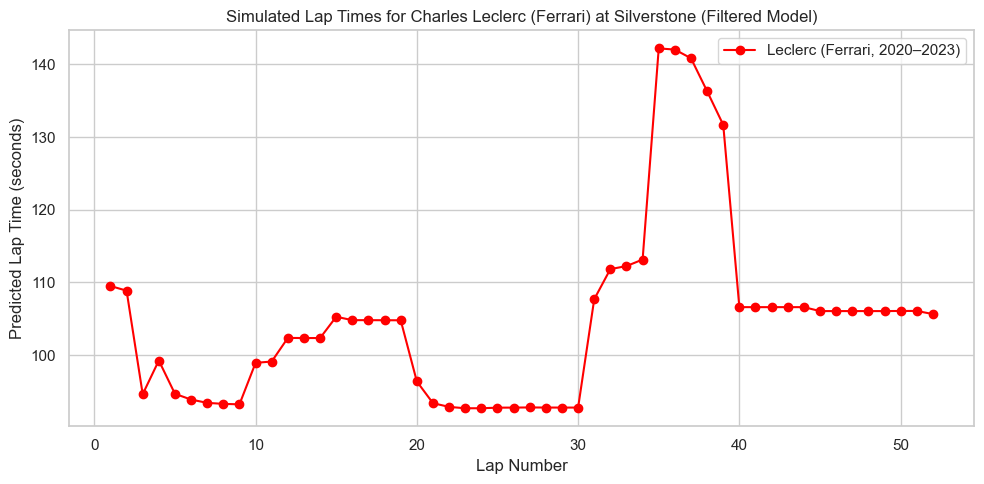

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# filter to 2020–2023 and only include Leclerc + Ferrari
recent_data = train_2025_clean[train_2025_clean['race_year'].between(2020, 2023)]
filtered_data = recent_data[
    (recent_data['driver'] == 'Leclerc, Charles') & 
    (recent_data['constructor'] == 'Ferrari')
].copy()

# re-encode categories for filtered dataset
filtered_data['driver_encoded'] = filtered_data['driver'].astype('category').cat.codes
filtered_data['constructor_encoded'] = filtered_data['constructor'].astype('category').cat.codes
filtered_data['circuit_encoded'] = filtered_data['circuit'].astype('category').cat.codes

# define features and target
feature_cols = [
    'lapNumber', 'lapPosition', 'pitStop', 'pitCount', 'pitTime_ms',
    'avgDriverFinish', 'avgConstructorFinish', 'is_pit_lap', 'race_year',
    'driver_encoded', 'constructor_encoded', 'circuit_encoded'
]
X_filtered = filtered_data[feature_cols]
y_filtered = filtered_data['lap_time_sec']

# train new model
leclerc_model = RandomForestRegressor(n_estimators=100, random_state=42)
leclerc_model.fit(X_filtered, y_filtered)

# encoding values
driver_categories = filtered_data['driver'].astype('category').cat.categories
constructor_categories = filtered_data['constructor'].astype('category').cat.categories
circuit_categories = filtered_data['circuit'].astype('category').cat.categories

driver_map = {v: k for k, v in enumerate(driver_categories)}
constructor_map = {v: k for k, v in enumerate(constructor_categories)}
circuit_map_rev = {k: v for k, v in enumerate(circuit_categories)}

leclerc_id = driver_map.get('Leclerc, Charles')
ferrari_id = constructor_map.get('Ferrari')
silverstone_id = [k for k, v in circuit_map_rev.items() if 'Silverstone' in v][0]

# simulate 52-lap Silverstone race
num_laps = 52
race_year = 2023
avg_driver_finish = 5.0 
avg_constructor_finish = 3.5 
pit_laps = [15, 35]
pit_time_value = 25000

sim_data = pd.DataFrame({
    'lapNumber': range(1, num_laps + 1),
    'lapPosition': range(1, num_laps + 1),
    'pitStop': [1 if lap in pit_laps else 0 for lap in range(1, num_laps + 1)],
    'pitTime_ms': [pit_time_value if lap in pit_laps else 0 for lap in range(1, num_laps + 1)],
    'is_pit_lap': [1 if lap in pit_laps else 0 for lap in range(1, num_laps + 1)],
    'race_year': [race_year] * num_laps,
    'avgDriverFinish': [avg_driver_finish] * num_laps,
    'avgConstructorFinish': [avg_constructor_finish] * num_laps,
    'driver_encoded': [leclerc_id] * num_laps,
    'constructor_encoded': [ferrari_id] * num_laps,
    'circuit_encoded': [silverstone_id] * num_laps
})
sim_data['pitCount'] = sim_data['pitStop'].cumsum()

# predict lap times using model
X_sim = sim_data[feature_cols]
sim_data['predicted_lap_time_sec'] = leclerc_model.predict(X_sim)

# plot
plt.figure(figsize=(10, 5))
plt.plot(sim_data['lapNumber'], sim_data['predicted_lap_time_sec'], marker='o', color='red', label='Leclerc (Ferrari, 2020–2023)')
plt.title("Simulated Lap Times for Charles Leclerc (Ferrari) at Silverstone (Filtered Model)")
plt.xlabel("Lap Number")
plt.ylabel("Predicted Lap Time (seconds)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()